## Developing a Convolutional Neural Network Classification Model

## EXP 3 

**Name:** Renusri Naraharashetty

**Reg No:** 212223240139
    
**Slot:** 4O1-1

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
transform=transforms.ToTensor()

In [5]:
train_data=datasets.MNIST(root='../Data',train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data=datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
type(train_data[0])

tuple

In [12]:
image, label=train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

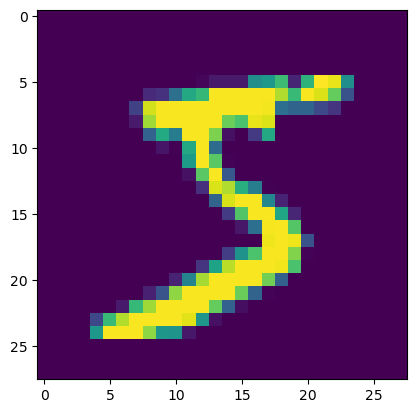

In [16]:
plt.imshow(image.reshape((28,28)))
plt.show()

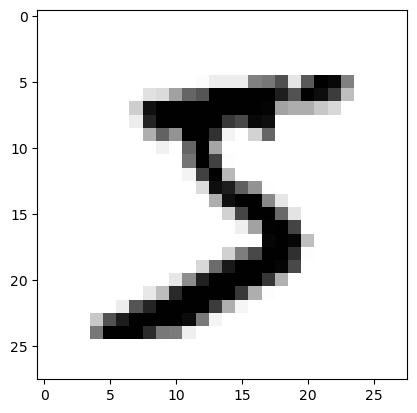

In [19]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')
plt.show()

In [20]:
torch.manual_seed(100)
train_loader=DataLoader(train_data,batch_size=100, shuffle=True)
test_loader=DataLoader(test_data, batch_size=500, shuffle=False)

In [21]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [22]:
for images,labels in train_loader: 
    break

In [23]:
images.shape

torch.Size([100, 1, 28, 28])

In [24]:
labels.shape

torch.Size([100])

In [25]:
print('Labels: ', labels[:12].numpy())

Labels:  [   4    3    6    2    5    8    6    5    6    3    2    3]


In [26]:
im = make_grid(images[:12], nrow=12)

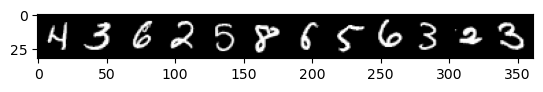

In [27]:
plt.imshow(np.transpose(im.numpy(),(1,2,0)));
plt.show()

In [28]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [29]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [32]:
images.shape

torch.Size([100, 1, 28, 28])

In [33]:
images.view(100,-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [34]:
images.view(100,-1).shape 

torch.Size([100, 784])

In [35]:
import time 
start_time = time.time()

# Training 

epochs = 10 

# Trackers 
train_losses = []
test_losses = []
train_correct = []
test_correct = []





for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for b,(X_train,y_train) in enumerate(train_loader):

        b+=1

        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)


        # 10 Neurons
        # [0.1, 0.0, .... 0.8]
        predicted = torch.max(y_pred.data,1)[1]   # print(y_pred.data)
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:

            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch{i}  batch {b}   loss: {loss.item()}  accuracy:{acc}')


    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted ==y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)






total_time = time.time() - start_time
print(f'Durations: {total_time/60} mins')

Epoch0  batch 200   loss: 0.23541299998760223  accuracy:83.25
Epoch0  batch 400   loss: 0.35372811555862427  accuracy:87.5275
Epoch0  batch 600   loss: 0.13645224273204803  accuracy:89.57333333333334
Epoch1  batch 200   loss: 0.2445889711380005  accuracy:94.84
Epoch1  batch 400   loss: 0.14444687962532043  accuracy:95.055
Epoch1  batch 600   loss: 0.07348385453224182  accuracy:95.355
Epoch2  batch 200   loss: 0.08567597717046738  accuracy:96.54
Epoch2  batch 400   loss: 0.06055755168199539  accuracy:96.6425
Epoch2  batch 600   loss: 0.062045298516750336  accuracy:96.71833333333333
Epoch3  batch 200   loss: 0.11591555923223495  accuracy:97.64
Epoch3  batch 400   loss: 0.05804160609841347  accuracy:97.475
Epoch3  batch 600   loss: 0.0296296626329422  accuracy:97.485
Epoch4  batch 200   loss: 0.11474043875932693  accuracy:98.185
Epoch4  batch 400   loss: 0.04435558244585991  accuracy:98.04
Epoch4  batch 600   loss: 0.05232115089893341  accuracy:98.05166666666666
Epoch5  batch 200   loss: 

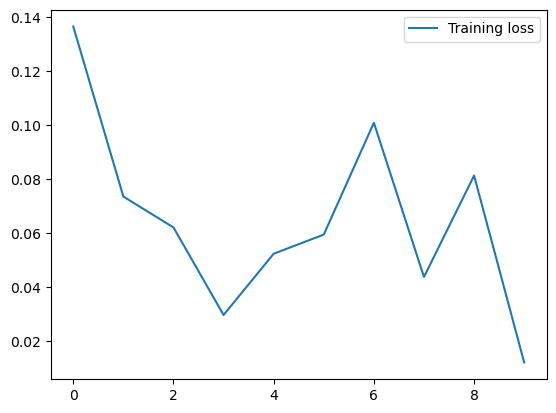

In [36]:
train_losses_np = [loss.detach().numpy() for loss in train_losses]

plt.plot(train_losses_np, label='Training loss')
plt.legend()
plt.show()

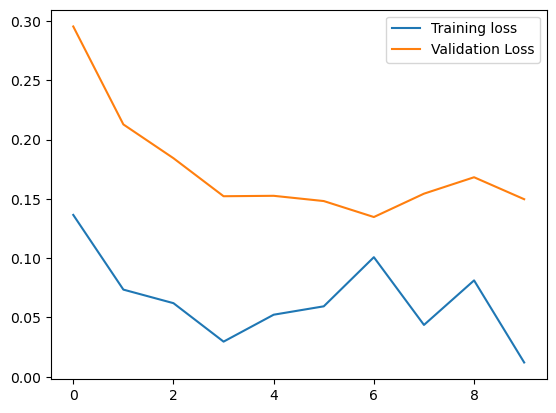

In [37]:
train_losses_np = [loss.detach().numpy() for loss in train_losses]
test_losses_np = [loss.detach().numpy() for loss in test_losses]
plt.plot(train_losses_np, label='Training loss')
plt.plot(test_losses_np, label='Validation Loss')
plt.legend()
plt.show()

In [38]:
train_correct

[tensor(53744),
 tensor(57213),
 tensor(58031),
 tensor(58491),
 tensor(58831),
 tensor(59041),
 tensor(59217),
 tensor(59351),
 tensor(59503),
 tensor(59580)]

In [39]:
train_correct

[tensor(53744),
 tensor(57213),
 tensor(58031),
 tensor(58491),
 tensor(58831),
 tensor(59041),
 tensor(59217),
 tensor(59351),
 tensor(59503),
 tensor(59580)]

In [40]:
train_correct[0]/600

tensor(89.5733)

In [41]:
train_acc = [t/600 for t in train_correct]

In [42]:
train_acc

[tensor(89.5733),
 tensor(95.3550),
 tensor(96.7183),
 tensor(97.4850),
 tensor(98.0517),
 tensor(98.4017),
 tensor(98.6950),
 tensor(98.9183),
 tensor(99.1717),
 tensor(99.3000)]

In [43]:
test_acc = [t/100 for t in test_correct]
test_acc

[tensor(94.3500),
 tensor(95.9100),
 tensor(96.8800),
 tensor(96.9900),
 tensor(97.4700),
 tensor(97.6000),
 tensor(97.8800),
 tensor(97.6000),
 tensor(97.6400),
 tensor(97.6400)]

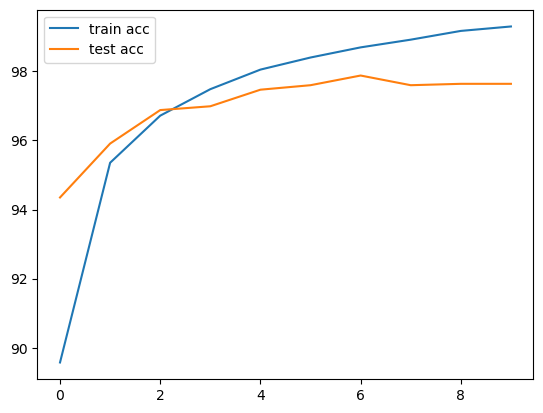

In [44]:
plt.plot(train_acc,label='train acc')
plt.plot(test_acc,label='test acc')
plt.legend()
plt.show()

In [45]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[  49,    0,    2,    0,    1,    1,    0,    0,    0,    0],
       [   0,   60,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   43,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0,    1,   51,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,   49,    0,    0,    0,    0,    1],
       [   0,    0,    0,    1,    0,   38,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,   47,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,   59,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,   48,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   42]],
      dtype=int64)